# 1.Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve



In [19]:
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd .read_csv('Titanic_train.csv')
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


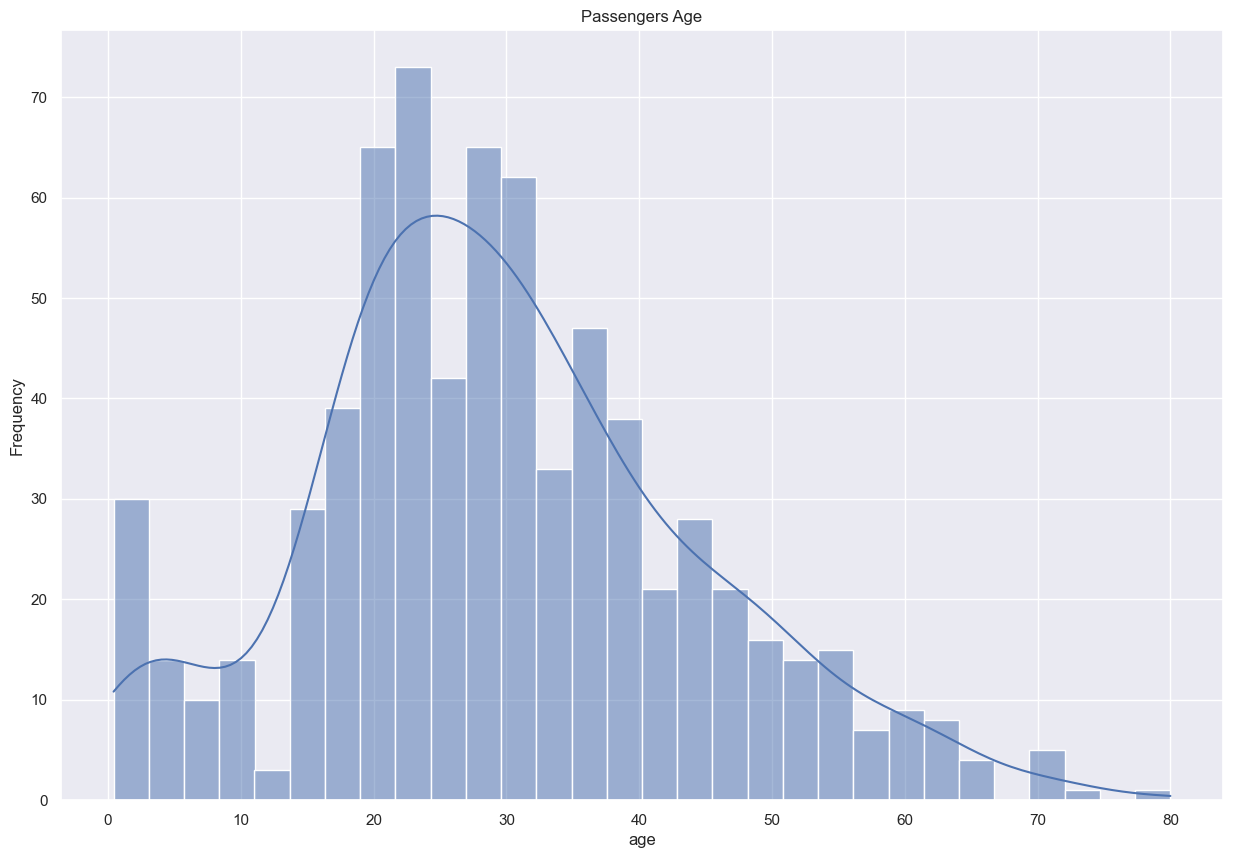

In [24]:
# Histogram

sns.set(style = "darkgrid")
plt.figure(figsize = (15,10))
sns.histplot(df_train['Age'].dropna(),kde = True, bins = 30)
plt.title('Passengers Age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

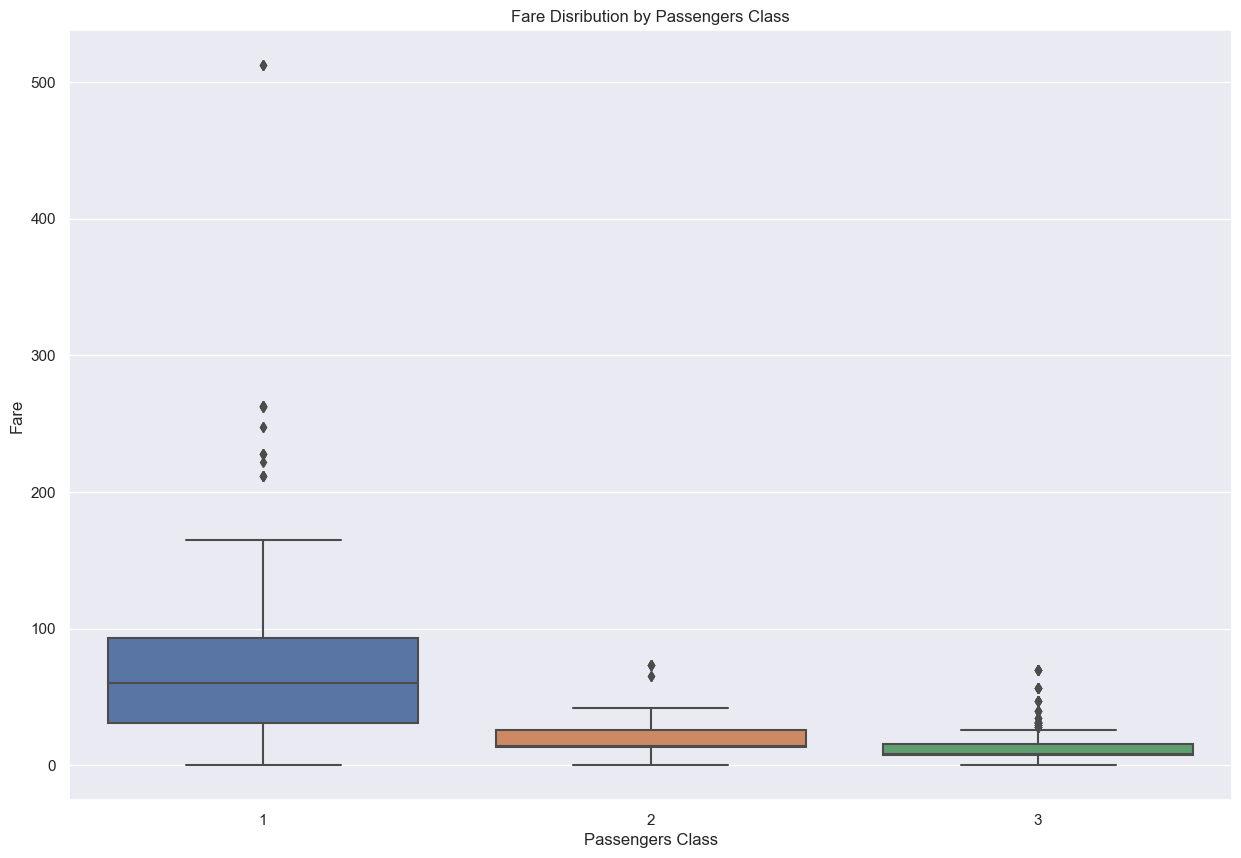

In [25]:
# Box plot

plt.figure(figsize = (15 , 10))
sns.boxplot(data = df_train, x= 'Pclass', y = 'Fare')
plt.title('Fare Disribution by Passengers Class')
plt.xlabel('Passengers Class')
plt.ylabel('Fare')
plt.show()

In [26]:
df_train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


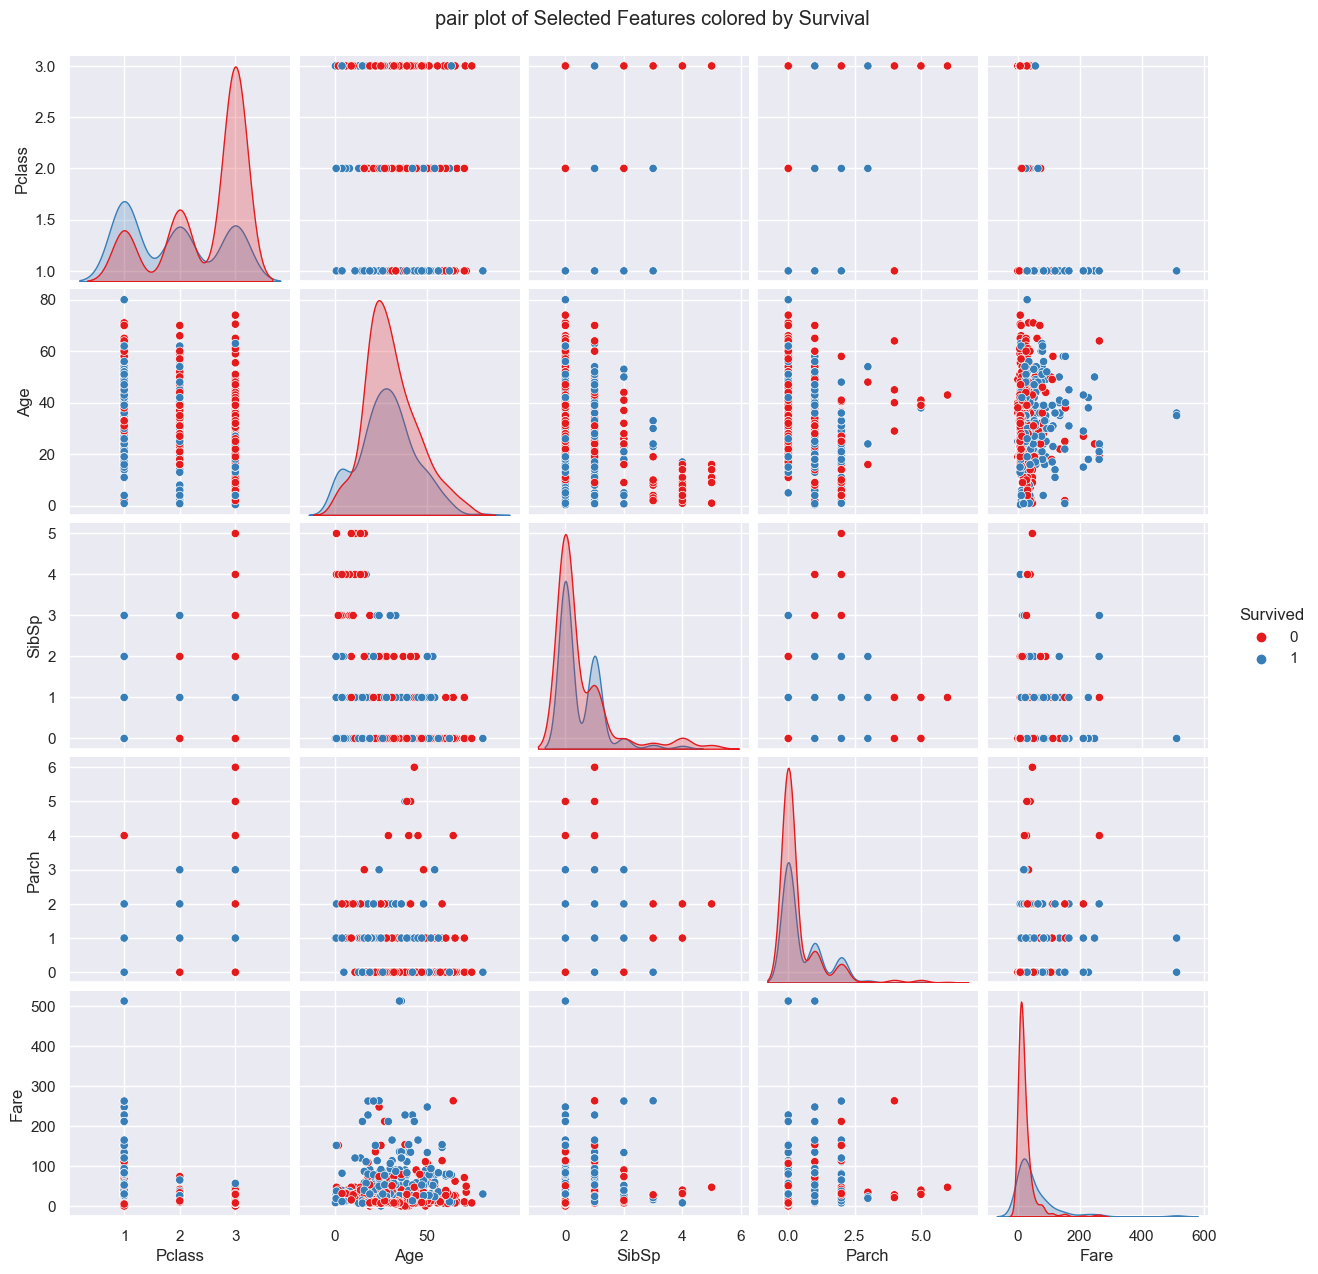

In [27]:
cleaned_train_df = df_train.dropna(subset=['Pclass', 'Age','SibSp','Parch','Fare','Survived'])

# Create pair plt with select numeric columns and hue
sns.pairplot(cleaned_train_df [['Pclass','Age','SibSp','Parch','Fare', 'Survived']], hue='Survived',palette='Set1')
plt.suptitle('pair plot of Selected Features colored by Survival',y=1.02)
plt.show()

# 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
Numerical columns - Age, and Fare, i'm using mean, median, or a specific value for imputation.
Categorical columns - Embarked, i'm using the mode (most frequent value). Cabin columns - impute with a placeholder

b. Encode categorical variables.
Convert categorical variables like Sex and Embarked into numerical format using techniques like one-hot encoding or label encoding.

In [28]:
df_train['Age'].fillna(df_train['Age'].median(),inplace = True)
df_train['Fare'].fillna(df_train['Fare'].median(),inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Cabin'].fillna('Unknown',inplace=True)
print(df_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [29]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1}) #Convert numerical format using label encoding

df_train = pd.get_dummies(df_train, columns = ['Embarked'], drop_first= True)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,False,False


# 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

In [30]:
df_train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [31]:
x= df_train.drop('Survived',axis=1)
y=df_train['Survived']
x_train,x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

# 4 . Model Evaluation:
-- a. Evalution performance of the model on testing data using , precision , recall,F1-score,and ROC- AUC score

-- b. Visualize the ROC curve

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy score.
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred)  # Precision score.
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_pred) # Recall score.
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_pred) # F1-score.
print(f'F1-Score: {f1 * 100:.2f}%')

roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC-AUC score.
print(f'ROC-AUC Score: {roc_auc * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)  # Display confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)  # Display classification report
print('Classification Report:')
print(class_report)
     

Accuracy: 79.33%
Precision: 78.46%
Recall: 68.92%
F1-Score: 73.38%
ROC-AUC Score: 86.34%
Confusion Matrix:
[[91 14]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



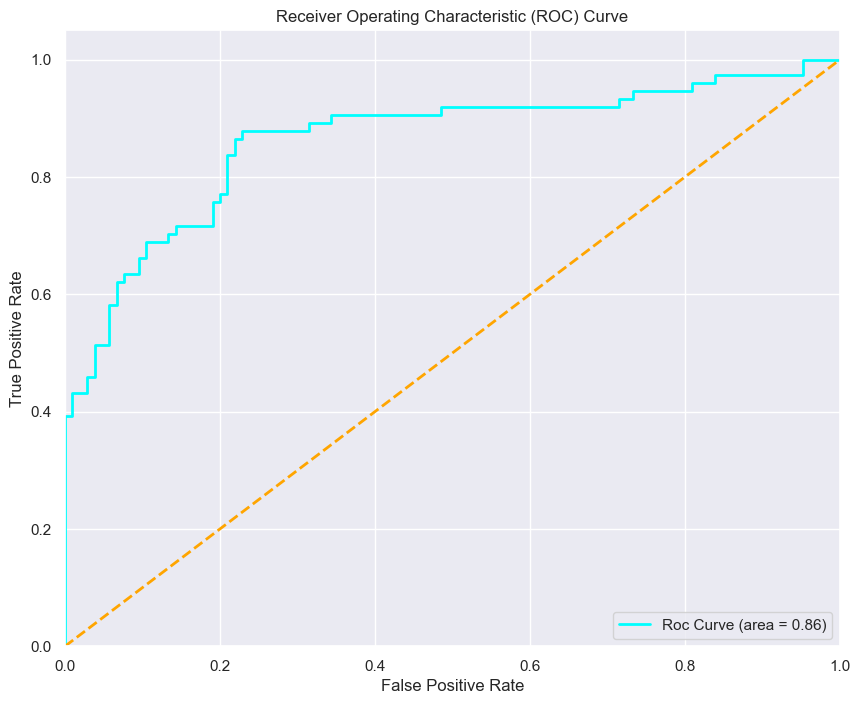

In [33]:
fpr, tpr, _ = roc_curve(y_test,y_pred_proba) #“ _ ” is a special variable in most Python REPLs that represents the result of the last expression evaluated by the interpreter.

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'cyan', lw = 2, label = f'Roc Curve (area = {roc_auc:.2f})') # fpr - false positive rate, tpr - true positive rate, lw - linewidth. .2f- after point 2fraction.
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])  #xlim - set the x-axis limits for the current axes or chart.
plt.ylim([0.0, 1.05]) #y limit
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right") #A legend is used to describe elements for a particular area of a graph.
#loc = used to specify the location of the legend. The default value of loc is loc= “best” (upper left). The strings 'upper left', 'upper right', 'lower left', and 'lower right'
plt.show()

# 5. Interpretation:

In [36]:
lr.fit(x_train, y_train)

coefficients = pd.DataFrame({
      'Feature' : x_train.columns,
      'Coefficient' : lr.coef_[0]
})    #coefficients and feature names

#coefficients = coefficients.append({'Feature': 'Intercept', 'Coefficient': lr.intercept_[0]},ignore_index = True) # Adding an intercept,
#Error above line -'DataFrame' object has no attribute 'append'.
#The main reason is that DataFrame no longer support append operation. It have to be changed with concat method.

intercept_df = pd.DataFrame({
      'Feature' : ['intercept'],
      'Coefficient' : [lr.intercept_[0]]
})  # The intercept term represents the log odds of the target variable when all features are set to zero.
coefficients = pd.concat([coefficients, intercept_df], ignore_index = True)

print (coefficients)


       Feature  Coefficient
0  PassengerId     0.000690
1       Pclass    -0.688034
2          Sex     2.659676
3          Age    -0.018244
4        SibSp    -0.233523
5        Parch    -0.159473
6         Fare     0.005536
7   Embarked_Q     0.065642
8   Embarked_S    -0.199548
9    intercept     0.379098


# Deployment with Streanlit

##### In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


In [37]:
pip install streamlit pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
import joblib

joblib.dump(lr, 'logistic_regression_model.pkl')  # Save the trained model.
     
['logistic_regression_model.pkl']

import streamlit as st
import pandas as pd
import numpy as np

model = joblib.load('logistic_regression_model.pkl')  # Load model

st.title('Titanic Survival Prediction') # Define the Streamlit app

st.header('Passenger Information')  # User inputs for prediction
pclass = st.selectbox('Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 25)
sibsp = st.slider('Number of Siblings/Spouses', 0, 8, 0)
parch = st.slider('Number of Parents/Children', 0, 6, 0)
fare = st.slider('Fare', 0.0, 513.0, 32.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

sex = 1 if sex == 'female' else 0     # Convert categorical variables
embarked_C = 1 if embarked == 'C' else 0
embarked_Q = 1 if embarked == 'Q' else 0
embarked_S = 1 if embarked == 'S' else 0

input_data = np.array([pclass, sex, age, sibsp, parch, fare, embarked_C, embarked_Q]).reshape(1, -1)  # Prepare the input for prediction

if st.button('Predict Survival'): # Make the prediction
    prediction = model.predict(input_data)
    survival_prob = model.predict_proba(input_data)[0][1]
    if prediction == 1:
        st.success(f'The passenger is likely to survive with a probability of {survival_prob:.2f}.')
    else:
        st.error(f'The passenger is unlikely to survive with a probability of {survival_prob:.2f}.')

     

#  Interview Questions:
###### 1. What is the difference between precision and recall?

Precision and recall are two evaluation metrics used to measure the performance of a classifier in binary and multiclass classification problems. Precision measures the accuracy of positive predictions, while recall measures the completeness of positive prediction.

###### Precision:
Def : Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). Formula : Precision = True Positives (TP) / True Positives (TP) + False Positives (FP).
Precision is more critical in situations where the cost of false positives is high. For example, in email spam detection, you want high precision to avoid marking legitimate emails as spam. If a model predicts that 100 emails are spam, and 80 of those are actually spam (20 are not), then the precision is 80/100 ​= 0.8 or 80%.

###### Recall (True Positive Rate):
Def: Recall is the ratio of true positive predictions to the total number of actual positive instances (true positives and false negatives).
Formula: Recall=True Positives (TP) / True Positives (TP) + False Negatives (FN).
Recall is more critical in situations where missing a positive instance (false negative) is more costly. For example, in medical diagnosis, high recall is important to ensure that all patients with a disease are correctly identified.

Precision focuses on the accuracy of the positive predictions, while recall focuses on the ability to identify all positive instances.

#### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical technique used to evaluate the performance of a machine learning model. It involves splitting the dataset into multiple subsets, training the model on some subsets, and testing it on the remaining ones. This process is repeated multiple times to ensure the model's performance is consistent and generalizable.

Importance in Binary Classification:

###### Model Evaluation: Cross-validation helps in obtaining a more accurate estimate of the model’s performance by testing it on multiple subsets of the data. This reduces the risk of overfitting to a specific train-test split.

###### Model Selection: Cross-validation is crucial when tuning hyperparameters or selecting between multiple models. It allows you to evaluate different configurations and choose the one that performs best on average.